LOAD DATA AND LIBRARIES

In [2]:
import pandas as pd
import regex as re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
#Get current working directory to avoid needing to redirect when moving the file path.

pwd = os.getcwd

#PreSettings for Graphs Style and Pandas displaying of columns

plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

Define the DataFrame

In [4]:
def load_dataset():
    df = pd.read_csv("Data - UFC.csv")
    return df

df = load_dataset()

DATA UNDERSTANDING:

    -Check amount of rows in dataset match with expected -> .shape

    -Look that all columns are seen when head().Check last fighter for reference

    -See stats in dataframe to gain further insights

In [5]:
df.shape

(4240, 11)

In [6]:
#In a Pandas Data Frame every column is a Series, and every series has a type.
df.info(verbose=True)

#And here we see that date is an object type, that we will change

df['date'] = pd.to_datetime(df['date'])
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   R_fighter     4240 non-null   object
 1   B_fighter     4240 non-null   object
 2   R_odds        4240 non-null   int64 
 3   B_odds        4240 non-null   int64 
 4   date          4240 non-null   object
 5   location      4240 non-null   object
 6   country       4240 non-null   object
 7   Winner        4240 non-null   object
 8   title_bout    4240 non-null   bool  
 9   weight_class  4240 non-null   object
 10  gender        4240 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 335.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   R_fighter     4240 non-null   object        
 1   B_fighter     4240 non-n

In [7]:
#See statistics on numerical data in our dataframe.
df.describe()

,R_odds,B_odds,date
count,4240.000000,4240.000000,4240
mean,-118.092217,68.525708,2015-09-13 08:36:33.962263808
min,-1700.000000,-1200.000000,2010-03-21 00:00:00
25%,-256.250000,-145.000000,2013-08-03 00:00:00
50%,-150.000000,130.000000,2015-11-07 00:00:00
75%,130.000000,225.000000,2018-01-20 00:00:00
max,775.000000,1300.000000,2020-03-14 00:00:00
std,272.796068,252.371462,NaN


In [8]:
df.head()

#df[['R_fighter','B_fighter']].iloc[-1]

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145,135,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160,-170,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345,315,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137,127,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160,150,2020-03-14,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE


DATA PREPARATION:

    -Drop irrelevant columns and rows, wether it is for lack of relevance or emptyness
    -Check for  double counted values, lets do it with country, but should be done with all cols if not familiarized with dataset.

In [9]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'location',
       'country', 'Winner', 'title_bout', 'weight_class', 'gender'],
      dtype='object')

In [10]:
#Select the columns you want in your working data frame, in this case, lets keep them all. The other way around could be to drop the specific columns we want to drop.

#df_copy_example = df[['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date',
#      'country', 'Winner', 'title_bout', 'weight_class', 'gender']].copy()

#df_copy_example.dtypes

In [11]:
#---DROP ROWS WITH MISSING VALUES.     NO MISSING VALUES FOUND

#1) Make a new DF without altering the previus one, but use more memory.

#Boolean series were True indicates a row has missing values
#has_missing_values = df.isnull().any(axis=1)
#count_missing_values = has_missing_values.sum()

#Use series to select rows in my DF that match and create a new df with only rows that have missing values
#rows_with_missing_values = df[has_missing_values]
#rows_with_missing_values

#2) Same goal with more memory salvage, but modifying the original DF. Take out inplace=True is a destructive method, to create a new one without risking missing data.

#df_without_missing_values = df.dropna(inplace=True)

#or

#--Fill missing values with a specific value. Same thing with the inplace argument
#df.fillna('EMPTY', inplace=True)

#---Check what rows got filled
#filled_rows = df[df.isna().any(axis=1)]
#for index, row in filled_rows.iterrows():
#    print(index, row)


Fix blank space in a column causing a double count

In [12]:
#1) Check the unique values in the country column:
unique_countries = df['country'].unique()
#print(unique_countries)

#2) Remove leading/trailing spaces from country names:
df['country'] = df['country'].str.strip()

#3) Check again
display(df[['country']].describe())
display(df['country'].unique())

,country
count,4240
unique,25
top,USA
freq,2502


array(['Brazil', 'USA', 'New Zealand', 'Canada', 'Uruguay', 'China',
       'United Arab Emirates', 'Mexico', 'Denmark', 'Australia',
       'Singapore', 'Russia', 'South Korea', 'Sweden', 'United Kingdom',
       'Czech Republic', 'Argentina', 'Germany', 'Chile', 'Poland',
       'Japan', 'Netherlands', 'Croatia', 'Ireland', 'Philippines'],
      dtype=object)

In [13]:
#---Let's take a peek at the features/Column information one-by-one:
# 1) -FIGHTERS-
#df[['R_fighter', 'B_fighter']].describe() #To know how many they fought, we must combine cols first

# 2) -DATE-          
#df[['date']].describe()
#unique_count = df['date'].nunique()  # = 362 unique days fought
#print(unique_count)

# 3) -ODDS-
#df[['R_odds', 'B_odds']].describe()

# 4) -LOCATION-
#  Las vegas with the most amount even though fights happened in 144 places
#df[['location']].describe()

# 5) -WINNER-              
#print(df['Winner'].describe()) #Red = 2430 de 4240 peleas
#print(df['Winner'].unique())

# 6) -TITLE BOUT- 4026 out of 4240 fights have NOT been title fights
#print(df['title_bout'].describe())

#7) -WEIGHT CLASS-
#print(df['weight_class'].describe())
#print()
#print(df['weight_class'].unique())

#8) -GENDER- 3854 of the 4240 fights have been in the male divisions
#print(df['gender'].describe())


SEARCH INFORMATION: Women/Men.                                            REMEMBER THIS IS ABOUT FIGHTS NOT FIGHTERS

    1) Wins per country (Done different)
    2) Most Succesfull country (Done different)
    3) Red vs Blue corner( DONE )
    4) AVG base on first or second half of the year. And if you fight twice a year? (Not Done)
    5) AVG per weight division (Done)
    6) Title Bout impact in probability of winning.(Done)

3 data sets: female_df, male_df and Both(df).


In [14]:
#---Data frame with both genders, check df liability
display(df['country'].unique())

#---Data frame for females
#female_df = df.loc[df['gender']=='FEMALE']
#female_df.reset_index(drop=True, inplace=True)

#---Data frame for males
# = df.loc[df['gender']=='MALE']
#male_df.reset_index(drop=True, inplace=True)

#print(female_df.head())

array(['Brazil', 'USA', 'New Zealand', 'Canada', 'Uruguay', 'China',
       'United Arab Emirates', 'Mexico', 'Denmark', 'Australia',
       'Singapore', 'Russia', 'South Korea', 'Sweden', 'United Kingdom',
       'Czech Republic', 'Argentina', 'Germany', 'Chile', 'Poland',
       'Japan', 'Netherlands', 'Croatia', 'Ireland', 'Philippines'],
      dtype=object)


    1- Fights Per Year
    2- Add Underdog and Upset Columns

        1) Fights per Year

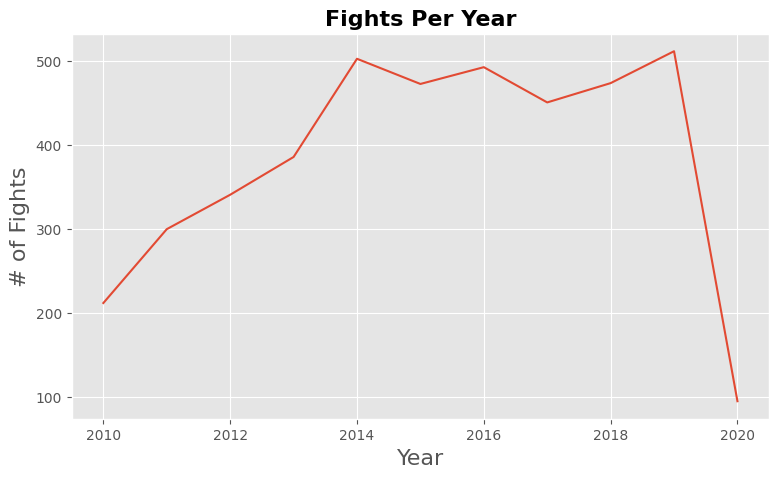

Timestamp('2020-03-14 00:00:00')

In [15]:
#Info we get: -2010 to 2014 we gradutally incremented fights per year. -2014 up to 2019 there have been around 400-500 fights per year.

year_labels = []                        #Get years in a list
for z in range(2010,2021):
    year_labels.append(z)

fight_counts = []                                       #fights_counts that represent the count of fights that occured in the corresponding year.
for z in (year_labels):                                 #len() = number of rows in the filtered df[df['date]... 
    fight_counts.append(len(df[df['date'].dt.year==z])) #By using the .dt accessor, you can access the datetime functionalities of the 'date' column.



plt.figure(figsize=(9,5))
plt.plot(year_labels,fight_counts)
plt.xlabel('Year', fontsize=16)
plt.ylabel('# of Fights', fontsize=16)
plt.title('Fights Per Year', fontweight='bold', fontsize= 16)
plt.show()

df['date'].max() 



[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[0, 0, 0, 16, 30, 44, 50, 62, 73, 92, 19]


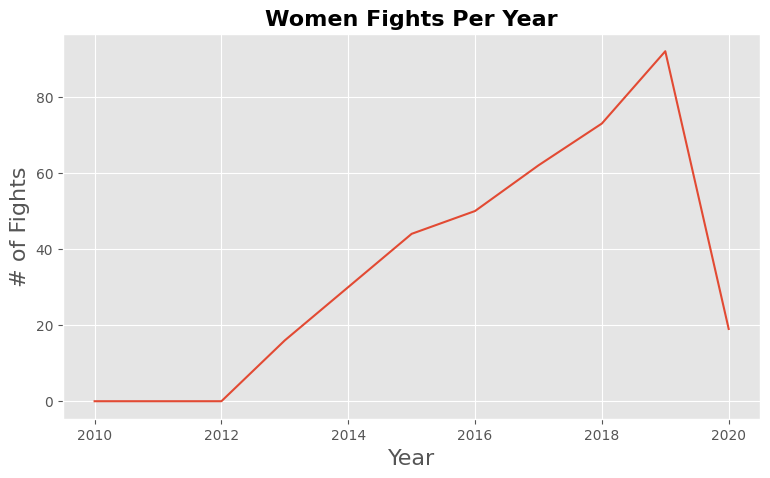

In [16]:
female_fight_counts = []

for z in (year_labels):
    female_fight_counts.append(len(
        df[(df['date'].dt.year==z) & (df['gender']=='FEMALE')])) 
    
print(year_labels)
print(female_fight_counts)


plt.figure(figsize=(9,5))
plt.plot(year_labels,female_fight_counts)
plt.xlabel('Year', fontsize=16)
plt.ylabel('# of Fights', fontsize=16)
plt.title('Women Fights Per Year', fontweight='bold', fontsize= 16)
plt.show()

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[212, 300, 341, 370, 473, 429, 443, 389, 401, 420, 76]


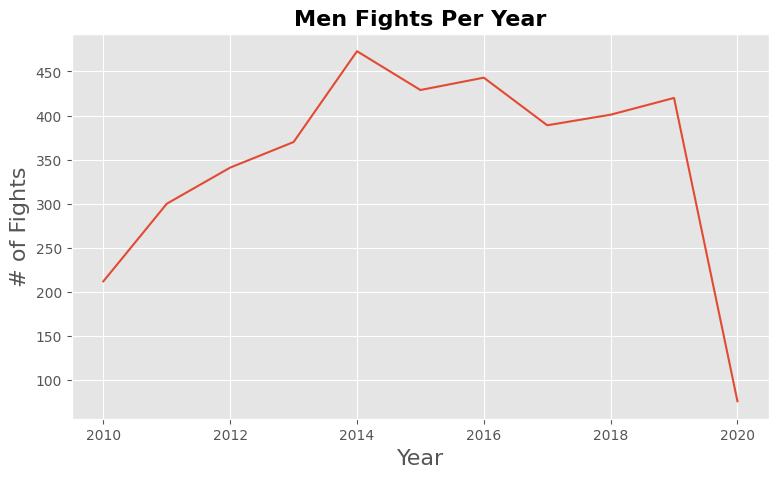

In [17]:
male_fight_counts = []

for z in (year_labels):
    male_fight_counts.append(len(
        df[(df['date'].dt.year==z) & (df['gender']=='MALE')])) 
    
print(year_labels)
print(male_fight_counts)


plt.figure(figsize=(9,5))
plt.plot(year_labels,male_fight_counts)
plt.xlabel('Year', fontsize=16)
plt.ylabel('# of Fights', fontsize=16)
plt.title('Men Fights Per Year', fontweight='bold', fontsize= 16)
plt.show()

        ##2) Add Underdog and Upset Columns

Number of fights including even fights and draws: 4240
Number of fights with even fights and draws removed: 4088
Fights:  4088
Upsets:  1409
Favorites:  2679
Upset %:  34.46673189823875
Favorite %:  65.53326810176125


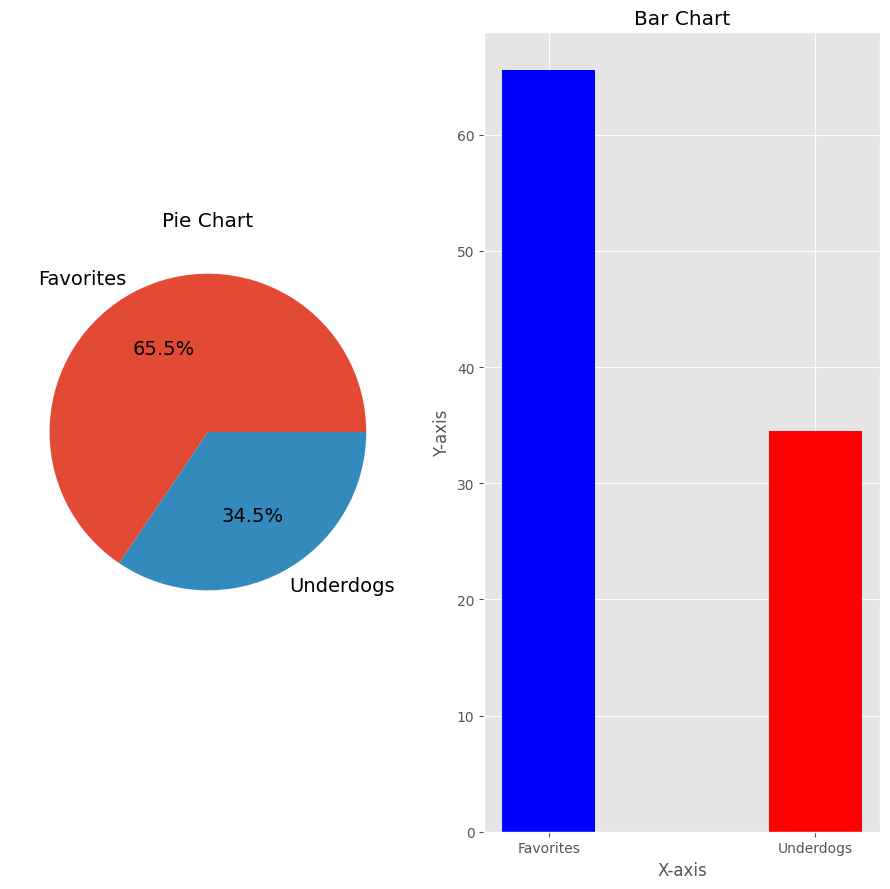

In [18]:
#Favorites win about 65.5% of the time. Let's take a deeper dive into this information.

df['Underdog'] = ''

red_underdog = df['R_odds'] > df['B_odds']
#print(red_underdog_mask)
#print()

blue_underdog = df['B_odds'] > df['R_odds']
#print(blue_underdog_mask)
#print()

even_dog = (df['B_odds'] == df['R_odds'])
#print(even_mask)
#print()

#Use .loc to assign a specific condition to a value in a column

df.loc[red_underdog,'Underdog'] = 'Red'       #loc[row_indexer,column_indexer]
df.loc[blue_underdog,'Underdog'] = 'Blue'
df.loc[even_dog,'Underdog'] = 'Even'

#print(df['Underdog'])
#print()

#---Upsets

#Fetch Data
df_no_even = df[df['Underdog'] != 'Even']

df_no_even = df_no_even[df_no_even['Winner'] != 'Draw']

print(f"Number of fights including even fights and draws: {len(df)}")
print(f"Number of fights with even fights and draws removed: {len(df_no_even)}")


number_of_fights = len(df_no_even)
number_of_upsets = len(df_no_even[df_no_even['Winner'] == df_no_even['Underdog']])
number_of_favorites = len(df_no_even[df_no_even['Winner'] != df_no_even['Underdog']])

print('Fights: ', number_of_fights)
print('Upsets: ',number_of_upsets)
print('Favorites: ',number_of_favorites)


#Use data:

upset_percent = (number_of_upsets / number_of_fights) * 100
favorite_percent = (number_of_favorites / number_of_fights) * 100

print('Upset %: ',upset_percent)
print('Favorite %: ',favorite_percent)

labels = 'Favorites', 'Underdogs'
sizes = [favorite_percent, upset_percent]

fig1, (ax1,ax2) = plt.subplots(1, 2, figsize=(9,9))    #Create a figure and a set of subplots with a single subplot assigned to the variable ax1.Lets add more than one subplot

#First subplot -Pie Chart
ax1.set_title('Pie Chart')                                
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})                #ax1.pie() is a method of the ax1 subplot object, used to plot a pie chart on the subplot.



#Make a second plot to practice syntax



#Second subplot - Bar Chart, you have to specify x and y.

x = [0, 1]          # Adjusted x-values for the second set of bars
bar_width = 0.35    # Width of the bars

# Specify colors for the bars
colors = ['blue', 'red']  # Change the color of the second bar to red

#Plot bar
ax2.bar(x, sizes, width=bar_width, color=colors)

ax2.set_xticks(x)
ax2.set_xticklabels(labels)

ax2.set_title('Bar Chart')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')



# Adjust spacing between subplots
plt.tight_layout()



plt.show()

How much does the upset rate vary year-to-year?
    -Create empty variables to store my info, year fight counts,year upset counts, and year upset percentage
    -Get info into the variables

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

[207, 292, 328, 372, 484, 460, 468, 432, 456, 496, 93]

[78, 91, 108, 115, 153, 179, 171, 138, 159, 180, 37]

[37.68115942028986, 31.164383561643838, 32.926829268292686, 30.913978494623656, 31.611570247933884, 38.91304347826087, 36.53846153846153, 31.944444444444443, 34.868421052631575, 36.29032258064516, 39.784946236559136]


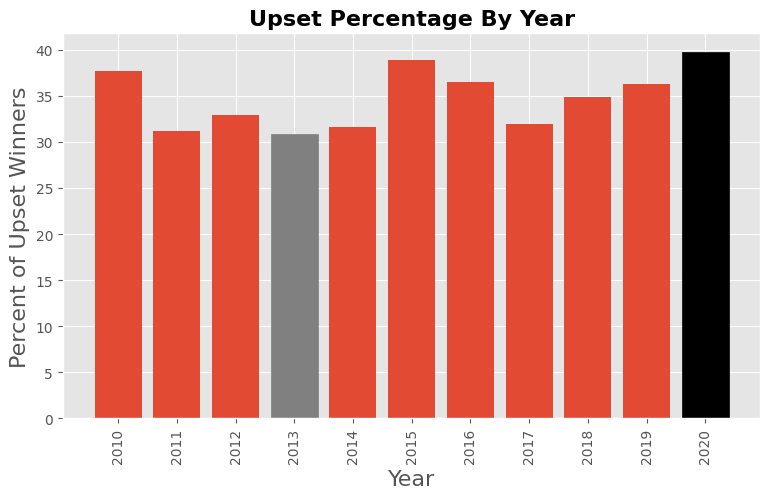

In [19]:
#Create empty variables and use year labels to access the years

year_labels
year_fight_count = []
year_upset_count = []
year_upset_percent = []

# For each element y in year labels, create temporary variables to store the date and count of upsets.
for y in year_labels:
    temp_fights = df_no_even[df_no_even['date'].dt.year==y]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['Underdog']]

    year_fight_count.append(len(temp_fights))
    year_upset_count.append(len(temp_upsets))
    year_upset_percent.append(len(temp_upsets)/len(temp_fights))

#Convert decimal to percentage
year_upset_percent = [x*100 for x in year_upset_percent]

print(year_labels)
print()
print(year_fight_count)
print()
print(year_upset_count)
print()
print(year_upset_percent)

#Make graph

plt.figure(figsize=(9,5))
barlist = plt.bar(year_labels, year_upset_percent)

plt.xlabel("Year", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(year_labels, rotation=90)
plt.title('Upset Percentage By Year', fontweight='bold', fontsize=16)

barlist[10].set_color('black')
barlist[3].set_color('grey')


Heat Map with Seaborn

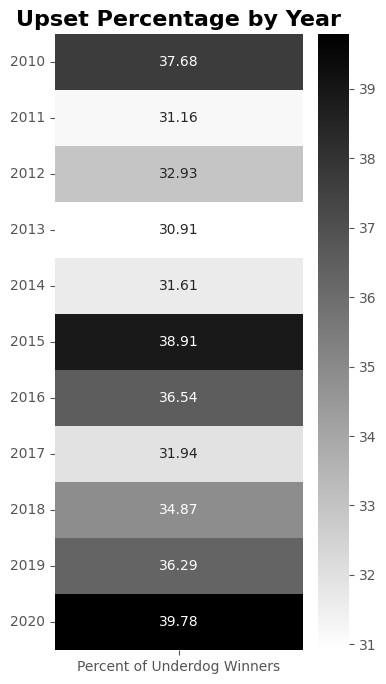

In [20]:
#Underdogs win between 30.9% and 39.8%. The best year for underdogs is 2020 so far. The worst year was 2013.

#Make a temporary version of a DF, in this case with only the % of upset. year_upset_percent is a list with the % per year.

temp_df = pd.DataFrame({"Percent of Underdog Winners": year_upset_percent},
                      index=year_labels)

#Plot
fig, ax = plt.subplots(figsize=(4,8))

sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)

plt.yticks(rotation=0)    #rotates the y-axis tick labels to a 0-degree angle, which means they will be displayed horizontally.

plt.title("Upset Percentage by Year", fontsize=16, fontweight='bold')

plt.show()

How do upsets vary by weight class?

['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight', "Women's Strawweight", "Women's Flyweight", "Women's Bantamweight", "Women's Featherweight", 'Catch Weight']

[200, 407, 466, 762, 723, 498, 336, 309, 155, 76, 126, 14, 16]

[67, 136, 171, 239, 259, 183, 115, 105, 49, 30, 45, 4, 6]

[33.5, 33.415233415233416, 36.69527896995708, 31.36482939632546, 35.82295988934993, 36.74698795180723, 34.226190476190474, 33.980582524271846, 31.61290322580645, 39.473684210526315, 35.714285714285715, 28.57142857142857, 37.5]


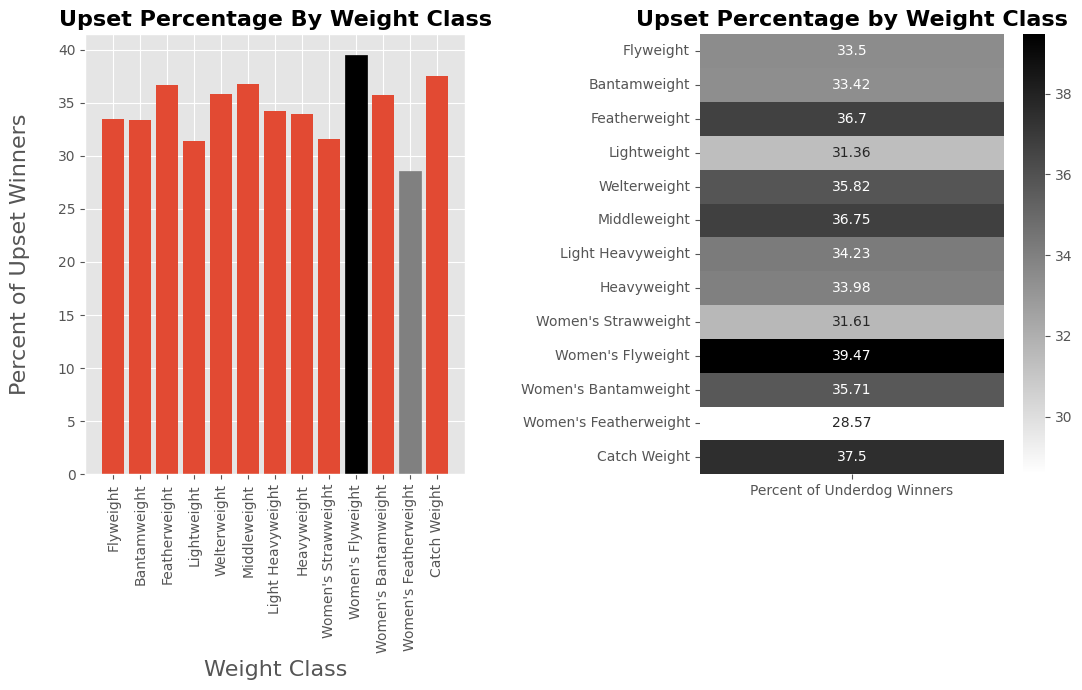

In [21]:
#Upset Percentage varies from 28.6% for Women's Featherweight to 39.5% for Women's Flyweight.

#weight_class_list = df['weight_class'].unique()
#We are manually going to enter the weight class list so we can enter it in order of lightest to heaviest.
weight_class_list = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 
                     'Middleweight', 'Light Heavyweight', 'Heavyweight', "Women's Strawweight", 
                    "Women's Flyweight", "Women's Bantamweight", "Women's Featherweight", "Catch Weight"]

wc_fight_counts = []
wc_upset_counts = []
wc_upset_percent = []

for wc in weight_class_list:
    temp_fights = df_no_even[df_no_even['weight_class'] == wc]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['Underdog']]

    wc_fight_counts.append(len(temp_fights))
    wc_upset_counts.append(len(temp_upsets))
    wc_upset_percent.append(len(temp_upsets)/len(temp_fights))

wc_upset_percent = [x*100 for x in wc_upset_percent]   

print(weight_class_list)
print()
print(wc_fight_counts)
print()
print(wc_upset_counts)
print()
print(wc_upset_percent)

#Plot

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(11,7))  #When creating subplots with plt.subplots(), you should use the respective subplot object (ax1, ax2) to call plotting functions for each subplot.

#First Plot
ax1.barlist = ax1.bar(weight_class_list, wc_upset_percent)

ax1.set_xlabel("Weight Class", fontsize=16,labelpad=5)
ax1.set_ylabel("Percent of Upset Winners", fontsize=16, labelpad=20)

ax1.set_xticks(range(len(weight_class_list)))  # Set tick positions
ax1.set_xticklabels(weight_class_list, rotation=90)

ax1.set_title('Upset Percentage By Weight Class', fontweight='bold', fontsize=16)

ax1.barlist[9].set_color('black')
ax1.barlist[11].set_color('grey')

#Second Plot
temp_df = pd.DataFrame({"Percent of Underdog Winners": wc_upset_percent},
                      index=weight_class_list)

sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax2)

ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
ax2.set_title("Upset Percentage by Weight Class", fontsize=16, fontweight='bold')


plt.tight_layout(w_pad=4.0, h_pad=2.0)


plt.show()

How do Upsets vary by Gender?

['MALE' 'FEMALE']

[3717, 371]

[1281, 128]

[34.463276836158194, 34.50134770889488]


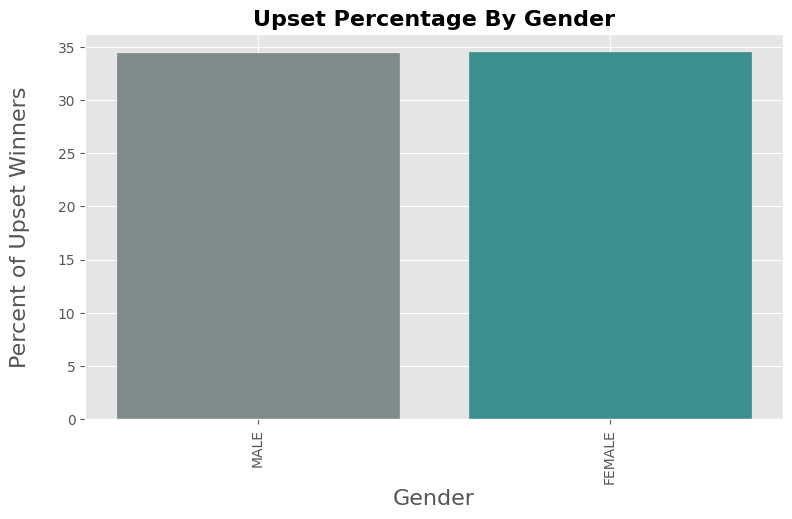

In [22]:
##The upset percentage for male and females is almost identical. Male underdogs win 34.46% of the time. Female underdogs win 34.50% of the time.


#We keep using the version of our df without even matches

#Fetch from  the DF the types of gender
gender_count = df['gender'].unique()


#Prepare data
gender_fight_count = []
gender_upset_count = []
gender_upset_percent = []

for g in gender_count:
    temp_fights = df_no_even[df_no_even['gender'] ==g]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['Underdog']]

    gender_fight_count.append(len(temp_fights))
    gender_upset_count.append(len(temp_upsets))
    gender_upset_percent.append(len(temp_upsets)/len(temp_fights))


gender_upset_percent = [x*100 for x in gender_upset_percent]


print(gender_count)
print()
print(gender_fight_count)
print()
print(gender_upset_count)
print()
print(gender_upset_percent)

#Plot
plt.figure(figsize=(9,5))
barlist = plt.bar(gender_count, gender_upset_percent)

plt.xlabel("Gender", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16, labelpad=20)

plt.xticks(gender_count, rotation=90)
plt.title('Upset Percentage By Gender', fontweight='bold', fontsize=16)

barlist[1].set_color('#3C8F8F')
barlist[0].set_color('#7F8A8A')

plt.show()



Are upsets more common in title fights?

[False  True]

[3880, 208]

[1342, 67]

[34.58762886597938, 32.21153846153847]


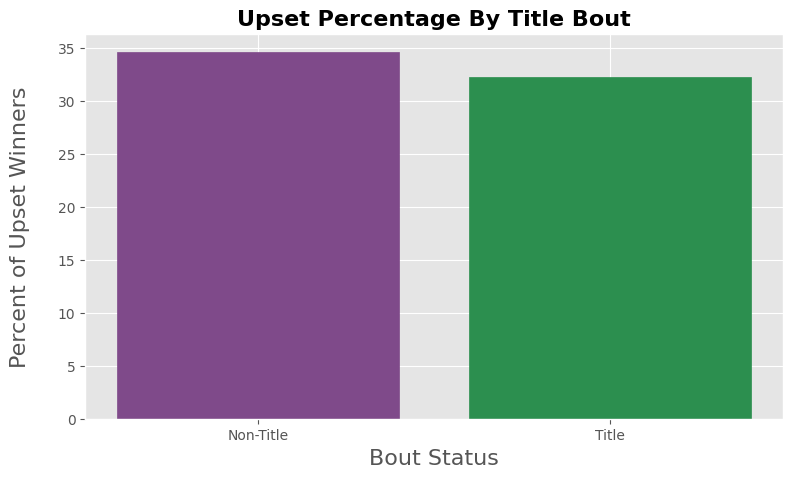

In [23]:
#Upsets are slightly more likely in non-title bouts. They occur 34.6% of the time compared to 32.2% of the time in title fights

#df.head()
#Get title fights column in a list

title_list = df_no_even['title_bout'].unique()

title_fight_count = []
title_upset_count = []
title_upset_percent = []

for t in title_list:
    temp_fights = df_no_even[df_no_even['title_bout'] ==t]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['Underdog']]

    title_fight_count.append(len(temp_fights))
    title_upset_count.append(len(temp_upsets))
    title_upset_percent.append(len(temp_upsets)/len(temp_fights))

title_upset_percent = [x*100 for x in title_upset_percent]


print(title_list)
print()
print(title_fight_count)
print()
print(title_upset_count)
print()
print(title_upset_percent)

#Plot
plt.figure(figsize=(9,5))
barlist = plt.bar(['Non-Title','Title'], title_upset_percent)

plt.xlabel("Bout Status", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16, labelpad=20)

plt.xticks(['Non-Title','Title'])
plt.title('Upset Percentage By Title Bout', fontweight='bold', fontsize=16)

barlist[1].set_color('#2C8F4F')
barlist[0].set_color('#7F4A8A')

plt.show()



Are upsets more likely in certain weight class title bouts?
Here we are starting to stray into an area where sample sizes may be too small for some weight classes. I still think this is worth exploring though to see if any anomalies stand out.

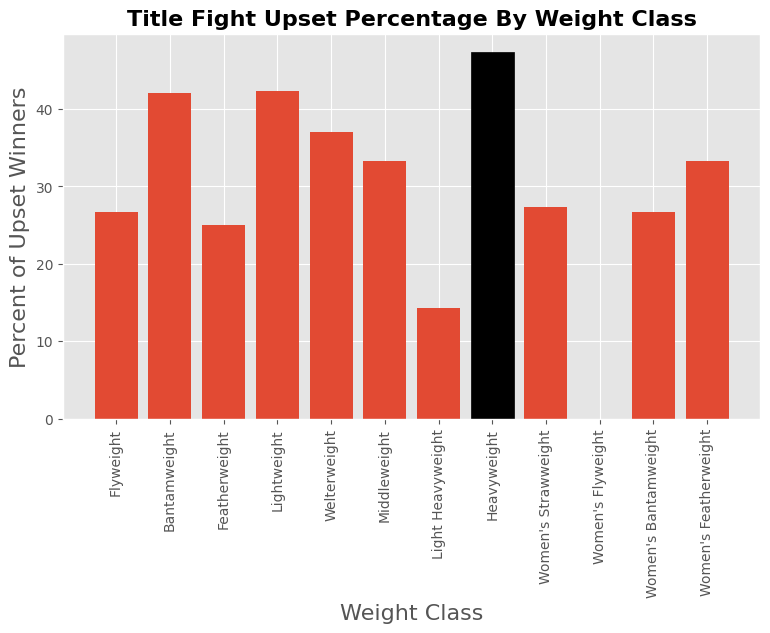

In [24]:
#Define a partioned dfnoeven with titlebout only
df_title = df_no_even[df_no_even['title_bout']==True]

#bring back the weight_class_list
weight_class_list = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 
                     'Middleweight', 'Light Heavyweight', 'Heavyweight', "Women's Strawweight", 
                    "Women's Flyweight", "Women's Bantamweight", "Women's Featherweight"]

#use the wc variables but set them again to an empty list
wc_fight_counts = []
wc_upset_counts = []
wc_upset_percent = []

#loop over weight class list ,get how many title bouts happened and how many upsets and the percent of that. Store in the same variables.
for wc in weight_class_list:
    temp_fights = df_title[df_title['weight_class']==wc]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['Underdog']]
    wc_fight_counts.append(len(temp_fights))
    wc_upset_counts.append(len(temp_upsets))
    wc_upset_percent.append(len(temp_upsets)/len(temp_fights))

#print(weight_class_list)
#print()
#print(wc_fight_counts)
#print()
#print(wc_upset_counts)
#print()
wc_upset_percent = [x*100 for x in wc_upset_percent]    
#print(wc_upset_percent)    

#Plot
plt.figure(figsize=(9,5))
barlist = plt.bar(weight_class_list, wc_upset_percent)
plt.xlabel("Weight Class", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(weight_class_list, rotation=90)
plt.title('Title Fight Upset Percentage By Weight Class', fontweight='bold', fontsize=16)
barlist[7].set_color('black')

plt.show()


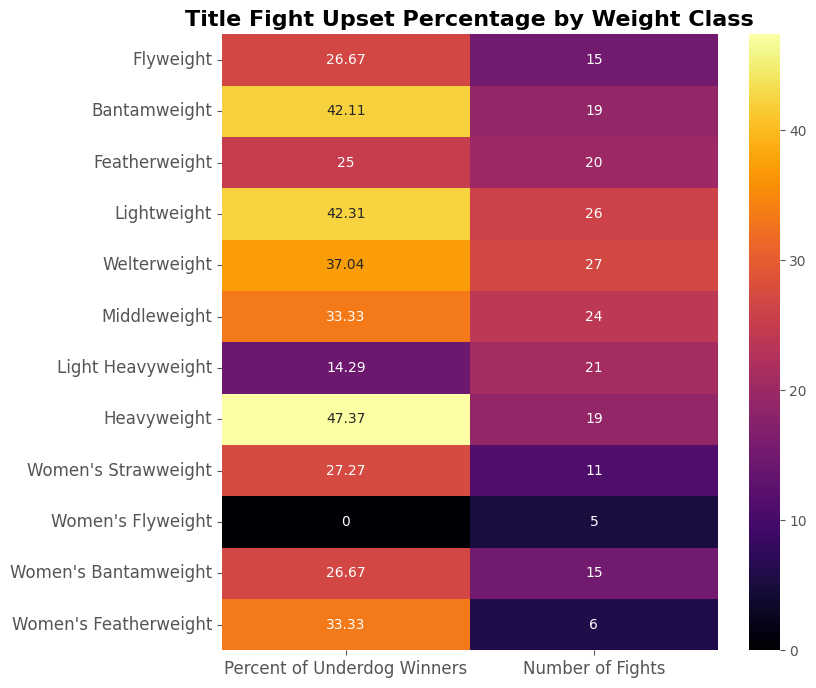

In [25]:
#In the five title fights in UFC Women's Flyweight history there has never been an upset. Out of 19 title fights in heavyweight history 47.37% of them have been won by the underdog.



temp_df = pd.DataFrame({"Percent of Underdog Winners": wc_upset_percent,        #Specify each column of the heatmap.When using a heatmap, you typically need to provide a DataFrame with numerical values as the input data.
                        "Number of Fights": wc_fight_counts},                   #The DataFrame should be structured such that the rows represent one variable or category, and the columns represent another variable or category. 
                      index=weight_class_list)

fig, ax = plt.subplots(figsize=(8,8))                                 #cmap='binary' sets the color map for the heatmap to a binary scheme.
sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='inferno', ax=ax)    #annot=True adds the data values to each cell in the heatmap.
#                                                                     #fmt=".4g" specifies the format for displaying the data values. In this case, it uses 4 significant digits.

plt.yticks(rotation=0, fontsize=12)                                   
plt.title("Title Fight Upset Percentage by Weight Class", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)

plt.show()

What location has the most upsets since 2010?

In [26]:
#9 Events have had 8 or more upsets. It is worth noting that they all take place between May 2012 and October 2016.

#It is possible that there are 2 events that occur in the same day, but there would not be two events on the same day in the same location.


#event_list = df_no_even['date'].unique()

#Get filtered df from already filtered df
event_df = df_no_even[['date', 'location']]
event_df = event_df.drop_duplicates()

#Get only the values in an array. Now we have an array(beacause of .values nature, now we can work with data with NumPy) with only date,location, no duplicates and no even matches.
event_array = event_df.values
#print(event_array)

upset_list = []
date_list = []
location_list = []

# for every row with date[0] and location[1] in event_array ...
for e in event_array:
    #Get all the fights that happened in one date and location. (This happens every computation, every different date)
    temp_event = df_no_even[(df_no_even['date'] == e[0]) & (df_no_even['location'] == e[1])]

    #Temp event now has all of the fights in the array.Now lets get the ones where the Underdog won.
    underdog_df = temp_event[ ( (temp_event['Winner'] == temp_event['Underdog']) ) ]
    
    #On every computation do this ... (this is how we get to copy data into our lists)
    upset_list.append(len(underdog_df)) 
    date_list.append(e[0])
    location_list.append(e[1])

#print(len(upset_list))   #367 rows 
#print(len(event_array))  #367 rows

# zip allows me to take iterables, like a list, and return an ITERATOR that will generate tuples by aggregating elements from each iterable pairing up their indices.
# I use list to convert the iterator into a list, containing tuples where each one has elements from the 3 zipped iterables.
# result = LIST OF TUPLES
upset_tuples = list(zip(location_list, date_list, upset_list))

#Make it into a data frame
upset_df = pd.DataFrame(upset_tuples, columns = ['location', 'date', 'upset_count'])

upset_df = upset_df.sort_values(by=['upset_count'], ascending=False)
display(upset_df.head(9))

,location,date,upset_count
204,"Porto Alegre, Rio Grande do Sul, Brazil",2015-02-22,10
149,"Sioux Falls, South Dakota, USA",2016-07-13,9
246,"Natal, Rio Grande do Norte, Brazil",2014-03-23,9
162,"Las Vegas, Nevada, USA",2016-03-05,8
310,"East Rutherford, New Jersey, USA",2012-05-05,8
298,"Toronto, Ontario, Canada",2012-09-22,8
241,"Cincinnati, Ohio, USA",2014-05-10,8
139,"Portland, Oregon, USA",2016-10-01,8
196,"Adelaide, South Australia, Australia",2015-05-09,8


Let's do a deeper dive into locations and how often upsets occur there. Let's start on the country level and then break it down into cities.

In [27]:
country_list = df_no_even['country'].unique()
#print(country_list)

upset_list = []
upset_per_list = []

#Loop
for c in country_list:
    #for the country c that now is selected, get the fights that happened in that country
    temp_event = df_no_even[(df_no_even['country']==c)]

    #Temp event now has all of the fights in the array.Filter again
    underdog_df = temp_event[((temp_event['Winner'] == temp_event['Underdog']))]

    #Assign to variables what we got from filtering: fights that happened per country and win by underdog in such country
    underdog_count = len(underdog_df)
    fight_count = len(temp_event)

    upset_per_list.append((underdog_count) / (fight_count) * 100)  

    upset_list.append(underdog_count) 


upset_tuples = list(zip(country_list, upset_list, upset_per_list))
upset_df = pd.DataFrame(upset_tuples, columns=['country', 'upset_count', 'upset_per'])
upset_df = upset_df.sort_values(by=['upset_count'], ascending=False)


print(upset_list)
print(country_list)


[135, 825, 8, 122, 4, 21, 10, 27, 7, 61, 13, 11, 10, 26, 54, 3, 5, 20, 3, 9, 19, 3, 3, 5, 5]
['Brazil' 'USA' 'New Zealand' 'Canada' 'Uruguay' 'China'
 'United Arab Emirates' 'Mexico' 'Denmark' 'Australia' 'Singapore'
 'Russia' 'South Korea' 'Sweden' 'United Kingdom' 'Czech Republic'
 'Argentina' 'Germany' 'Chile' 'Poland' 'Japan' 'Netherlands' 'Croatia'
 'Ireland' 'Philippines']


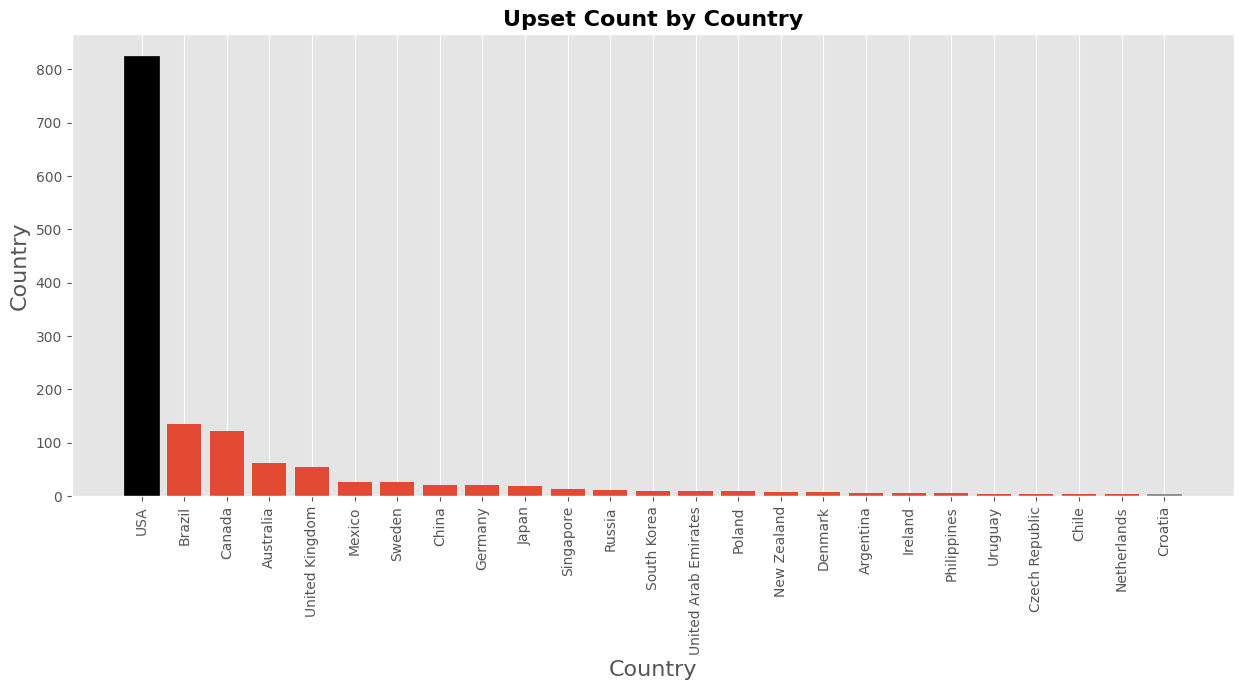

In [28]:
#Plot
plt.figure(figsize=(15, 6))
barlist = plt.bar(upset_df['country'], upset_df['upset_count'])

plt.grid(axis='y')

plt.xlabel('Country', fontsize= 16)
plt.ylabel('Country', fontsize= 16)

plt.xticks(upset_df['country'], rotation=90)

plt.title('Upset Count by Country', fontweight='bold', fontsize=16)

barlist[0].set_color('black')
barlist[24].set_color('grey')

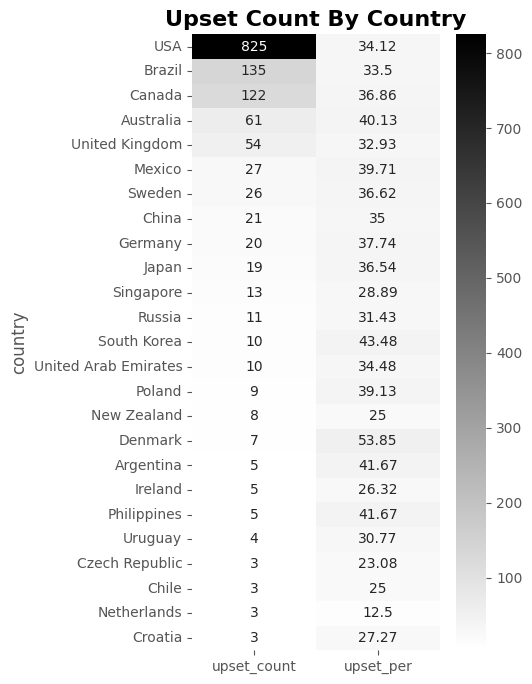

In [29]:
#Set country as index
temp_df = upset_df.set_index('country')

fig, ax = plt.subplots(figsize=(4,8))
sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)

plt.yticks(rotation=0)
plt.title("Upset Count By Country", fontsize=16, fontweight='bold')
plt.show()

Not super informative by itself. Let's take a look at the upset percentage by country.

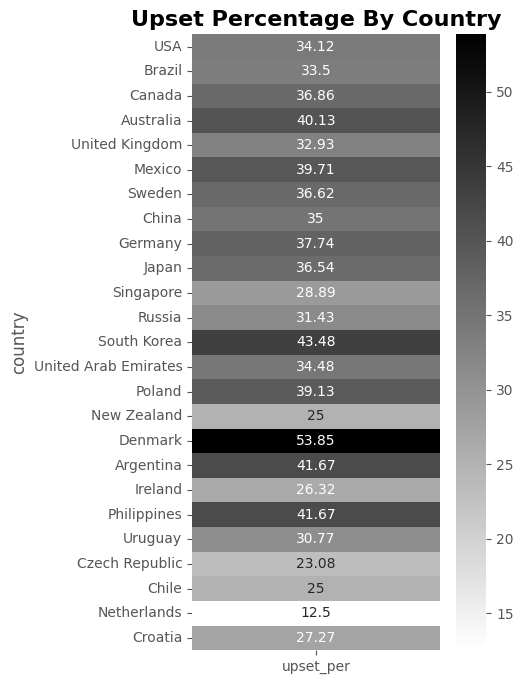

In [30]:
#Filter the df and take out the count of upset fights, leave the avg

temp_df = upset_df[['country', 'upset_per']]
temp_df = temp_df.set_index('country')

fig, ax = plt.subplots(figsize=(4,8))
sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)

plt.yticks(rotation=0)

plt.title("Upset Percentage By Country", fontsize=16, fontweight='bold')
plt.show()

#This is more interesting. The countries are still arranged buy upset count( because that was the layout in upset_df before), but here you can see the upset percentages.
# As there are less fights the percentages start to vary by more. This makes sense. There is still considerable amount of variance at the top of the list. 
# The United Kingdom shows a significant lack of upsets. Australia is the only country in the top 12 by upset count to have an upset percentage over 40%.

Let's Look at it City-by_City

In [31]:
location_list = df_no_even['location'].unique()
#print(len(location_list))  144 different locations

upset_list = []
upset_per_list = []

#Loop

for l in location_list:
    #for the location l that now is selected, get the fights that happened in that country
    temp_event = df_no_even[(df_no_even['location']== l)]

    #Temp event now has all of the fights in the array.Filter again
    underdog_df = temp_event[((temp_event['Winner'] == temp_event['Underdog']))]

    #Assign to variables what we got from filtering: fights that happened per location and win by underdog in such location
    underdog_count = len(underdog_df)
    fight_count = len(temp_event)

    upset_per_list.append((underdog_count) / (fight_count) * 100)  

    upset_list.append(underdog_count) 

upset_tuples = list(zip(location_list, upset_list, upset_per_list))
upset_df = pd.DataFrame(upset_tuples, columns=['location', 'upset_count', 'upset_per'])
upset_df = upset_df.sort_values(by=['upset_count'], ascending=False)

#print(upset_list)
#print(country_list)
display(upset_df)

,location,upset_count,upset_per
1,"Las Vegas, Nevada, USA",256,34.594595
47,"Toronto, Ontario, Canada",33,45.205479
22,"Boston, Massachusetts, USA",29,40.845070
39,"London, England, United Kingdom",26,35.616438
30,"Stockholm, Sweden",26,36.619718
...,...,...,...
58,"Utica, New York, USA",2,16.666667
90,"Salt Lake City, Utah, USA",1,10.000000
134,"Gold Coast, Queensland, Australia",1,11.111111
89,"Cleveland, Ohio, USA",1,10.000000


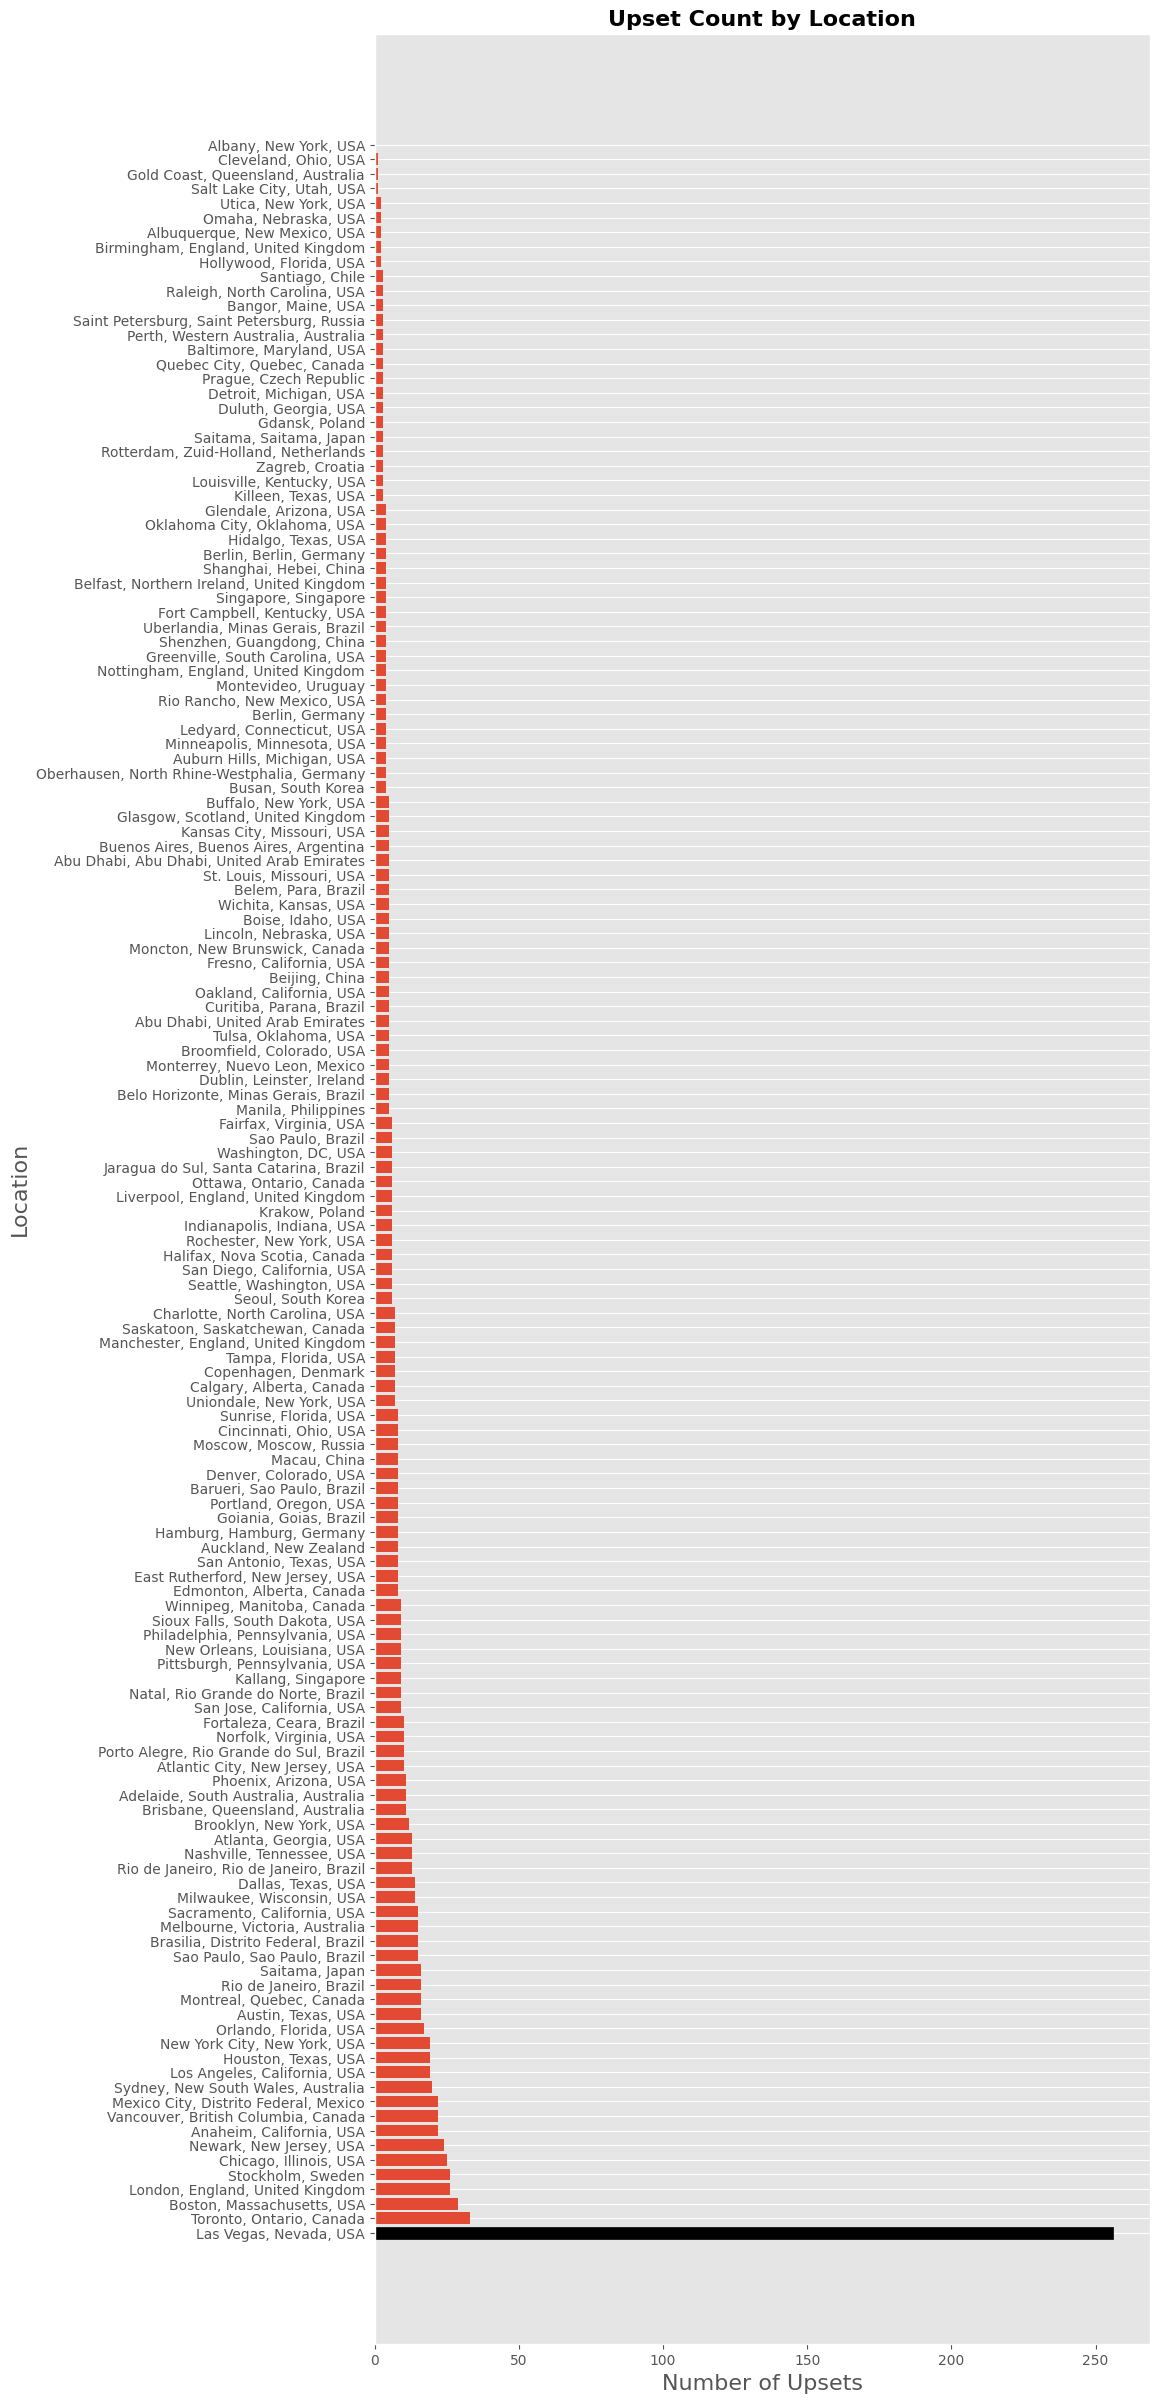

In [32]:
#Plot

plt.figure(figsize=(10,30))
plt.grid(axis='x')

barlist = plt.barh(upset_df['location'], upset_df['upset_count'])

plt.xlabel("Number of Upsets", fontsize=16)
plt.ylabel("Location", fontsize=16)

plt.yticks(upset_df['location'])
plt.title('Upset Count by Location', fontweight='bold', fontsize=16)

barlist[0].set_color('black')
barlist[-1].set_color('grey')

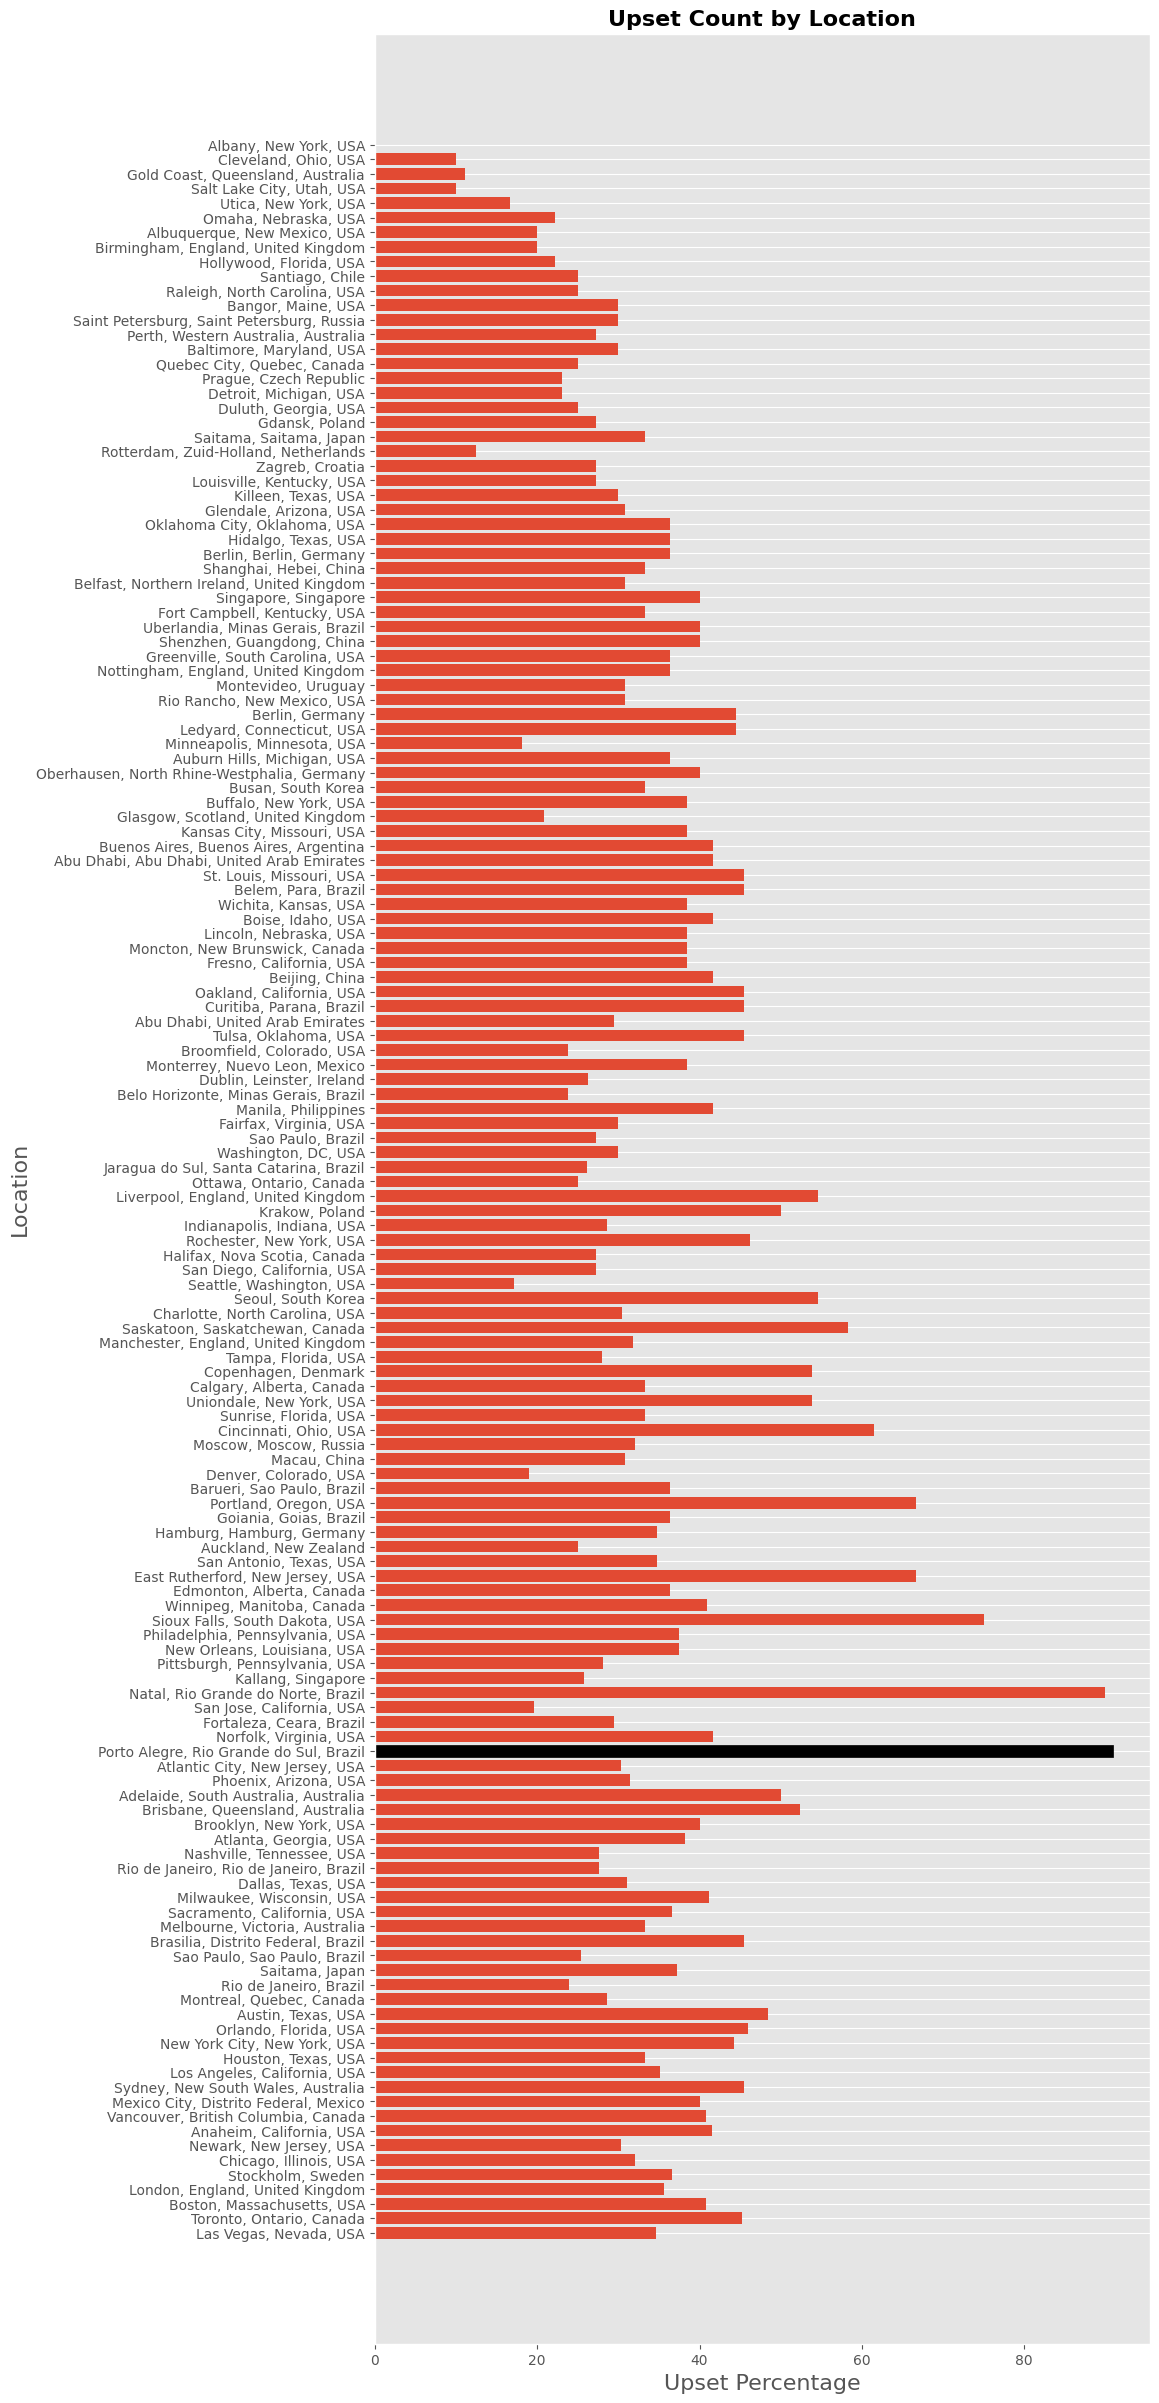

In [33]:
plt.figure(figsize=(10,30))
plt.grid(axis='x')

barlist = plt.barh(upset_df['location'], upset_df['upset_per'])

plt.xlabel("Upset Percentage", fontsize=16)
plt.ylabel("Location", fontsize=16)

plt.yticks(upset_df['location'])
plt.title('Upset Count by Location', fontweight='bold', fontsize=16)

barlist[33].set_color('black')
barlist[-1].set_color('grey')

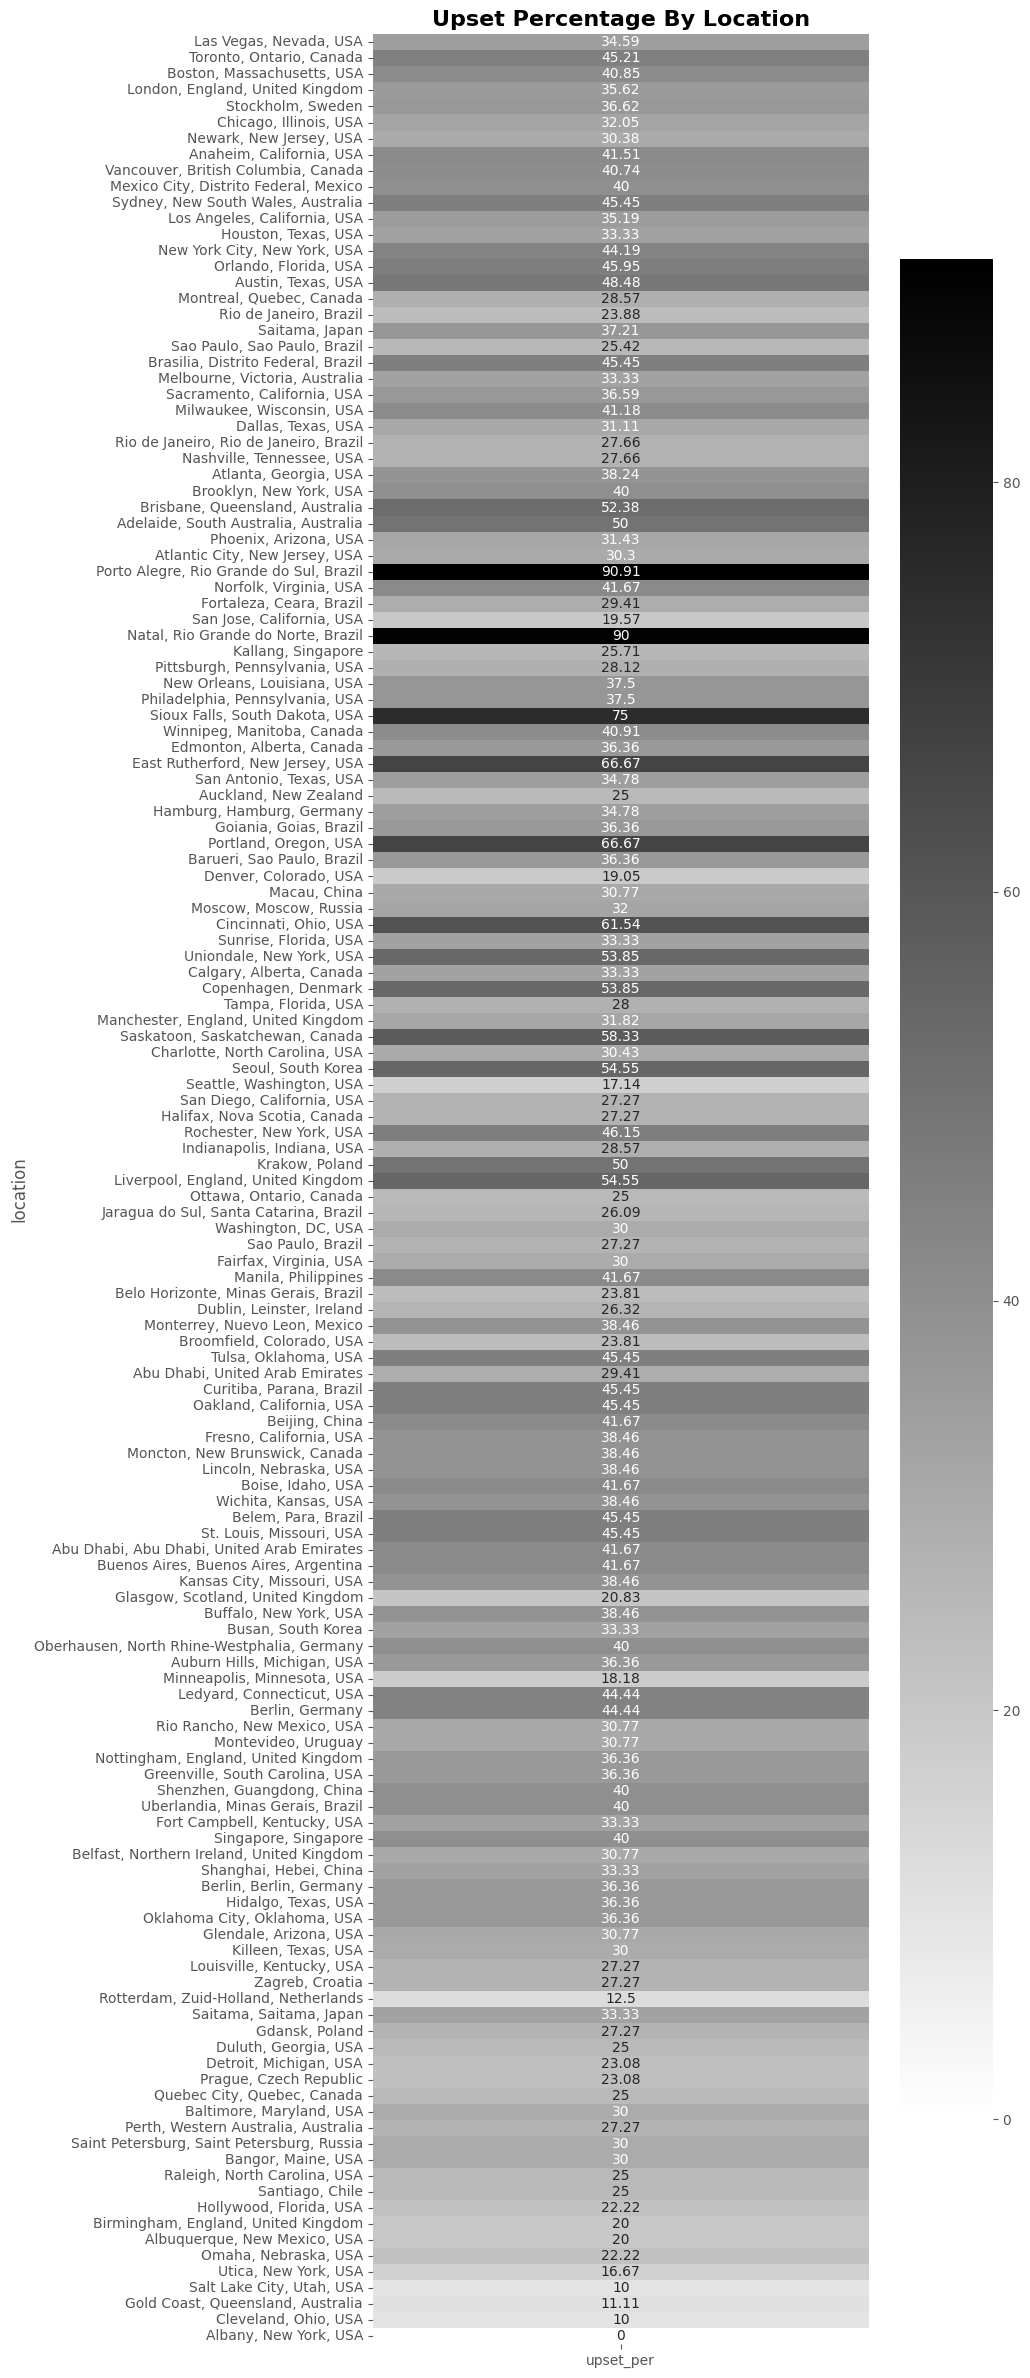

In [34]:
#Brazil has two locations that have had over 90% upsets: Porto Alegre, Rio Grande do Sul and Natal, Rio Grande do Norte. Albany, New York, USA is the only location to never have an upset.
temp_df = upset_df[['location', 'upset_per']]
temp_df = temp_df.set_index('location')

fig, ax = plt.subplots(figsize=(8,30))

sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)

plt.yticks(rotation=0)
plt.title("Upset Percentage By Location", fontsize=16, fontweight='bold')

plt.show()

Largest Upsets since 2010

In [35]:
#The three largest upsets of the last 10 years all were in the Bantamweight division, and they all occurred over a period of 9 months. As this are upsets, the winner is not the one with the winner odds
#-------------------------------------------------------------------------------------------------------------------------------------

#Filters the DataFrame df_no_even to select rows where "Winner" is equal to "Underdog". Any modifications made to underdog_win_df do not affect the original DataFrame 
underdog_win_df = df_no_even[(df_no_even['Winner'] == df_no_even['Underdog'])].copy()


#Create new col. Assign the max value between B and R odds. max(1) finds max value across each row axis=1
underdog_win_df['winner_odds'] = underdog_win_df[['B_odds', 'R_odds']].values.max(1)


#This line sorts the DataFrame underdog_win_df based on the values in the "winner_odds" column in descending order.
underdog_win_df = underdog_win_df.sort_values(by=['winner_odds'], ascending=False)


#This line creates a new DataFrame underdog_display by selecting specific columns from underdog_win_df.
underdog_display = underdog_win_df[['R_fighter', 'B_fighter', 'weight_class', 'date', 'Winner', 'winner_odds']]

display(underdog_display.head(10))

,R_fighter,B_fighter,weight_class,date,Winner,winner_odds
2844,Eddie Wineland,Johnny Eduardo,Bantamweight,2014-05-10,Blue,735
2435,Iuri Alcantara,Frankie Saenz,Bantamweight,2015-02-22,Blue,725
2823,Renan Barao,TJ Dillashaw,Bantamweight,2014-05-24,Blue,710
2898,Ronny Markes,Thiago Santos,Middleweight,2014-03-23,Blue,660
302,Roxanne Modafferi,Maycee Barber,Women's Flyweight,2020-01-18,Red,655
172,Devonte Smith,Khama Worthy,Lightweight,2019-08-17,Blue,650
2614,Niklas Backstrom,Mike Wilkinson,Featherweight,2014-10-04,Blue,650
4199,BJ Penn,Frankie Edgar,Lightweight,2010-04-10,Blue,620
1680,Thiago Santos,Eric Spicely,Middleweight,2016-09-24,Blue,550
985,Paul Craig,Magomed Ankalaev,Light Heavyweight,2018-03-17,Red,550


In [36]:
# #Playing around.Already found better ways to explore the data that allows you have it better prepared for plotting
# #---Count wins by each color
# win_R = int(0)
# win_B = int(0)
# ties = int(0)

# for index, row in df_no_even.iterrows():
#     if row['Winner'] == 'Red':
#         win_R += 1
#     elif row['Winner'] == 'Blue':
#         win_B += 1
#     elif row['Winner'] == 'Draw':
#         ties += 1
        
# total_fights = win_R + win_B + ties
# percentage_R = round(win_R * 100/ total_fights,2)
# percentage_B = round(win_B * 100/ total_fights,2)
# percentage_ties = round(ties * 100/ total_fights,2)


# #---Create a df with a selection of the columns involved.
# wins_Data = [[total_fights, win_R, win_B,ties], ['%100 ', f"%{percentage_R}", f"%{percentage_B}",f"%{percentage_ties}"]]
# wins_df = pd.DataFrame(wins_Data, columns=['Total', 'Red Wins', 'Blue Wins','Draws'],index=['-','-'])
# wins_df




SAVE MODIFIED VERSION TO SAVE IN MY SQL with my SQLAlchemy

In [37]:
#Might be good practice to make this a security copy, so that when i wanna work i have to work on a copy not the original.To update we will use sqlalchemy

#df.to_csv('Data02 - UFC.csv', index=False)